### Download data and uncompress the files into this folder

https://drive.google.com/file/d/1T6tbrVA_hS-oUX1wiHLa2MJ4ymg0Ho1i/view?usp=sharing

In [1]:
import numpy as np
import scipy.special as ss
import json
import math

import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### Plotting specifications

In [2]:
# 15yr plotting specs
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

### Useful functions

In [3]:
def hd(angseps):
    xx = 0.5 * (1-np.cos(angseps))
    return 1.5*xx*np.log(xx) - 0.25*xx + 0.5

In [4]:
def al(ell):
    if ell == 0:
        return 0.
    elif ell == 1:
        return 0.
    else:
        return 1.5 * (2.0*ell+1.0) * math.factorial(ell-2) / math.factorial(ell+2)

## Pairwise correlation data

In [5]:
datapath = './figure7_data/'

In [ ]:
# os_5f_vg = np.load(datapath + 'correlations_variedgamma_nfreq5.npz')
# os_14f_vg = np.load(datapath + 'correlations_variedgamma_nfreq14.npz')
# xi_5f_vg, rho_5f_vg, sig_5f_vg = os_5f_vg['xi'], os_5f_vg['rho'], os_5f_vg['sig']
# xi_14f_vg, rho_14f_vg, sig_14f_vg = os_14f_vg['xi'], os_14f_vg['rho'], os_14f_vg['sig']

## Legendre spectrum

In [6]:
cosangseps_tmp = np.cos(np.linspace(0.,np.pi,1000))

p0 = np.ones_like(cosangseps_tmp)
p1 = cosangseps_tmp
p2 = 0.5 * (3*cosangseps_tmp**2 - 1)
p3 = 0.5 * (5*cosangseps_tmp**3 - 3*cosangseps_tmp)
p4 = 0.125 * (35*cosangseps_tmp**4 - 30*cosangseps_tmp**2 + 3)

In [7]:
def legendre_poly(ell, cosx):
    coeffs = ss.legendre(ell).coeffs[::-1]
    return np.sum(np.array([coeffs[ii]*cosx**ii for ii in range(ell+1)]),axis=0)

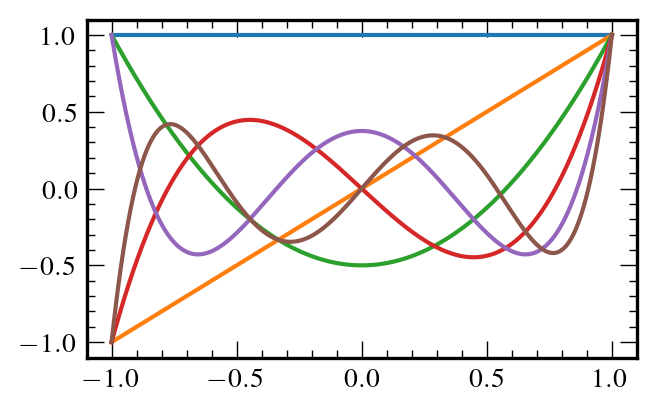

In [8]:
plt.plot(cosangseps_tmp, legendre_poly(0,cosangseps_tmp));
plt.plot(cosangseps_tmp, legendre_poly(1,cosangseps_tmp));
plt.plot(cosangseps_tmp, legendre_poly(2,cosangseps_tmp));
plt.plot(cosangseps_tmp, legendre_poly(3,cosangseps_tmp));
plt.plot(cosangseps_tmp, legendre_poly(4,cosangseps_tmp));
plt.plot(cosangseps_tmp, legendre_poly(5,cosangseps_tmp));
plt.show()

#### Parameter estimation for lmax=5

In [9]:
xi_14f_vg = np.load(datapath + 'xi_14f_vg.npy')

In [10]:
cosxi = np.cos(xi_14f_vg)

lmax = 5
Mleg = np.column_stack([legendre_poly(ii,cosxi) for ii in range(lmax+1)])

In [ ]:
#theta_hat_14f_vg = np.zeros((rho_14f_vg.shape[0],Mleg.shape[1]))

#for ii in range(theta_hat_14f_vg.shape[0]):
    
#    fisher_14f_vg = Mleg.T @ np.diag(1 / sig_14f_vg[ii]**2) @ Mleg
#    fisher_14f_vg_inv = sl.pinv(fisher_14f_vg)
#    theta_hat_14f_vg_tmp = fisher_14f_vg_inv @ Mleg.T @ np.diag(1 / sig_14f_vg[ii]**2) @ rho_14f_vg[ii]
    
#    theta_hat_14f_vg[ii,:] = theta_hat_14f_vg_tmp
    
    ####
    
#    if ii % 1000 == 0: print(ii)

In [11]:
theta_hat_14f_vg = np.load(datapath + 'theta_hat_14f_vg.npy')

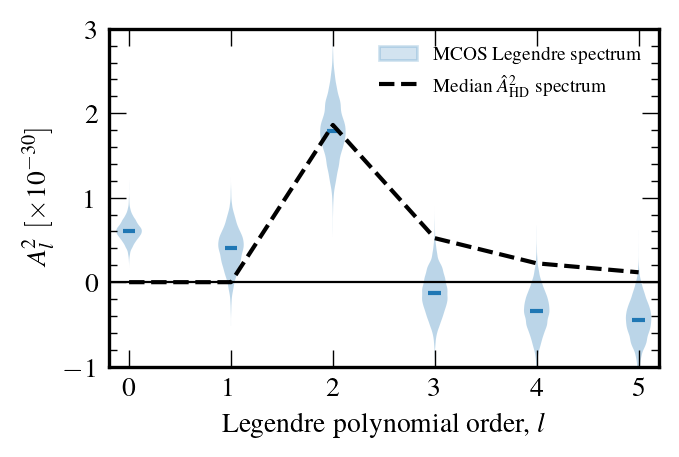

In [12]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as tck

fig = plt.figure()
ax = fig.add_subplot(111, rasterized=True)

v2 = ax.violinplot(theta_hat_14f_vg/1e-30, positions=np.arange(0,6), 
                    widths=0.25, showextrema=False, showmedians=True);

ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.tick_params(which='both',direction='in',
               tick2On=True)
ax.hlines(0,-1,6,color='k',lw=0.8)
ax.plot(range(0,6), [5.9560577362506165*al(ii) 
                     for ii in range(0,6)], 
        color='k', ls='dashed')
plt.xlim(-0.2,5.2)
plt.ylim(-1,3)
plt.xlabel('Legendre polynomial order, $l$')
plt.ylabel('$A_l^2\,\,\,[\\times 10^{-30}]$')

n14f_legend = mpatches.Patch(color='C0', label=r'MCOS Legendre spectrum', alpha=0.2)
bayes = mlines.Line2D([], [], color='k', 
                      label=r'Median $\hat{A}^2_\mathrm{HD}$ spectrum', 
                      ls='dashed', alpha=1.0)
ax.legend(handles=[n14f_legend, bayes],loc='upper right',frameon=False)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()
#plt.savefig('os_legendre_vg.pdf',bbox_inches='tight',dpi=400)